In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices("GPU"))
# print(device_lib.list_local_devices())

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import cv2
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [11]:
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)
print(tf.config.list_physical_devices("GPU"))
print(device_lib.list_local_devices())

Python version: 3.9.18 (main, Sep 11 2023, 14:09:26) [MSC v.1916 64 bit (AMD64)]
TensorFlow version: 2.10.0
OpenCV version: 4.8.1
NumPy version: 1.26.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15882089137776997442
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1745302324
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13256809322050712164
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [12]:
# img_array = cv2.imread("Dataset/train/angry/Training_3908.jpg")

In [13]:
# img_array.shape

In [14]:
#print(img_array)

In [15]:
# plt.imshow(img_array)

In [16]:
img_size = 224
Datadirectory = "Dataset/train/"

In [39]:
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

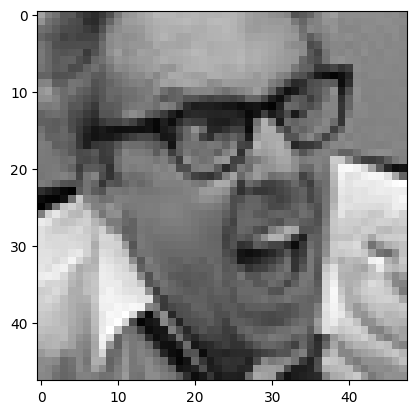

In [18]:
img_array = cv2.imread("Dataset/train/angry/Training_3908.jpg")
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# for _ in Classes:
#     path = os.path.join(Datadirectory, _)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path, img))
#         # backToRGB = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
#         plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
#         plt.show();
#         break
#     break

In [20]:
# img_size = 224
# new_array = cv2.resize(img_array, (img_size, img_size))
# plt.imshow(cv2.cvtColor(new_array,  cv2.COLOR_BGR2RGB))
# plt.show()

In [21]:
# new_array.shape

### Real all the image and convert them to array
   

In [22]:
# training_Data = []

# def create_training_Date():
#     for category in Classes:
#         path = os.path.join(Datadirectory, category)
#         class_num = Classes.index(category)
#         for img in os.listdir(path):
#             try:
#                 img_array = cv2.imread(os.path.join(path, img))
#                 new_array = cv2.resize(img_array, (img_size, img_size))
#                 training_Data.append([new_array, class_num])
#             except Exception as e:
#                 pass

In [23]:
# Function to load and preprocess images
def create_training_data():
    training_data = []
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing {os.path.join(path, img)}: {str(e)}")
    return training_data

In [24]:
training_Data = create_training_data()

In [25]:
print(len(training_Data))

28709


In [26]:
import random
random.shuffle(training_Data)

In [27]:
X = [] # data/feature
y = [] # label

for features, label in training_Data:
    X.append(features);
    y.append(label);

X = np.array(X).reshape(-1, img_size, img_size, 3) # Converted to 4D

In [28]:
# X.shape

### Normalize the data

In [29]:
X = X/255.0 # Normalizing it 

In [30]:
# y[0]

In [31]:
Y = np.array(y)

In [32]:
# Y.shape

## Deep learning Model for training - Transfer learning

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
# model = tf.keras.applications.MobileNetV2() ## Pretrained Model

In [35]:
# Deep learning Model for training - Transfer learning
model = tf.keras.applications.MobileNetV2(
    include_top=False, weights="imagenet", input_shape=(img_size, img_size, 3)
)
for layer in model.layers:
    layer.trainable = False

In [36]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

### Transfer Learning - Tuning , weights will start from last check point

In [37]:
# base_input = model.layers[0].input
# base_output = model.layers[-2].output

In [38]:
# base_output

In [39]:
# final_output = layers.Dense(128)(base_output) ## New layer Added
# final_output = layers.Activation("relu")(final_output) ## activation layer
# final_output = layers.Dense(64)(final_output)
# final_output = layers.Activation("relu")(final_output)
# final_output = layers.Dense(7, activation = "softmax")(final_output) ## Classification layer

In [40]:
flatten_layer = layers.Flatten()(model.output)
final_output = layers.Dense(128, activation="relu")(flatten_layer)
final_output = layers.Dense(64, activation="relu")(final_output)
final_output = layers.Dense(7, activation="softmax")(final_output)

In [41]:
# final_output

In [42]:
# new_model = keras.Model(inputs = base_input, outputs = base_output)

In [43]:
new_model = tf.keras.models.Model(inputs=model.input, outputs=final_output)

In [44]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [45]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [46]:
# with tf.device("/GPU:0"):
#     new_model.fit(X, Y, epochs=10)

In [47]:
physical_devices = tf.config.list_physical_devices("GPU")
print("Available GPUs:", physical_devices)

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [48]:
effective_batch_size = 35  

# Example using a generator for training
def data_generator(X, Y, batch_size):
    num_samples = len(X)
    while True:
        indices = np.random.choice(num_samples, batch_size, replace=False)
        yield X[indices], Y[indices]


# Usage in fit
with tf.device("/GPU:0"):
    new_model.fit(
        data_generator(X, Y, effective_batch_size),
        epochs=15,
        steps_per_epoch=len(X) // effective_batch_size,
    )

Epoch 1/15
820/820 [==============================] - 83s 93ms/step - loss: 1.7081 - accuracy: 0.5497
Epoch 2/15
820/820 [==============================] - 76s 93ms/step - loss: 0.8769 - accuracy: 0.7025
Epoch 3/15
820/820 [==============================] - 76s 93ms/step - loss: 0.6597 - accuracy: 0.7784
Epoch 4/15
820/820 [==============================] - 75s 91ms/step - loss: 0.5464 - accuracy: 0.8170
Epoch 5/15
820/820 [==============================] - 73s 89ms/step - loss: 0.4402 - accuracy: 0.8531
Epoch 6/15
820/820 [==============================] - 74s 91ms/step - loss: 0.3626 - accuracy: 0.8807
Epoch 7/15
820/820 [==============================] - 73s 89ms/step - loss: 0.3201 - accuracy: 0.8919
Epoch 8/15
820/820 [==============================] - 75s 91ms/step - loss: 0.2441 - accuracy: 0.9179
Epoch 9/15
820/820 [==============================] - 74s 90ms/step - loss: 0.2239 - accuracy: 0.9252
Epoch 10/15
820/820 [==============================] - 73s 89ms/step - loss: 0.200

### effective_batch_size = total_available_gpu_memory / memory_per_batch

In [22]:
new_model.save("Trained_model.h5")

In [23]:
new_model = tf.keras.models.load_model("Trained_model.h5")

In [24]:
new_model.evaluate  ## Test data, instead we gonna use the live demo

<bound method Model.evaluate of <keras.engine.functional.Functional object at 0x000001AE01137C70>>

In [25]:
frame = cv2.imread("download.jpeg")

In [26]:
frame.shape

(177, 188, 3)

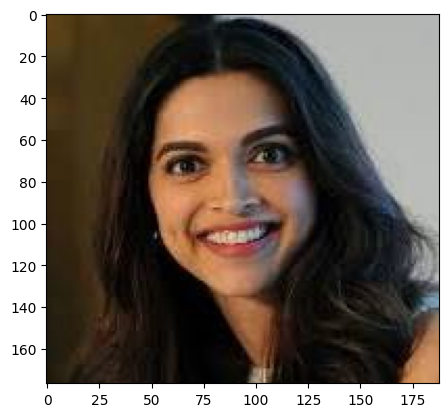

In [27]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#### We need face detection Algo (work on Gray image)

In [28]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml" )

In [29]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape

(177, 188)

In [31]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("No Face Detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]

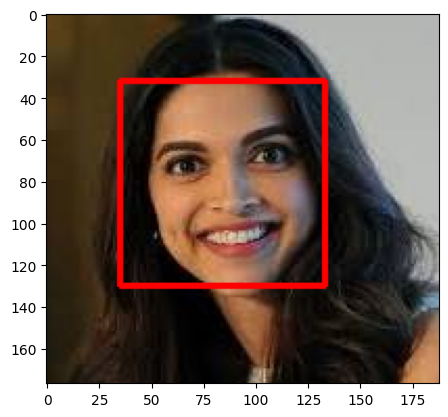

In [32]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

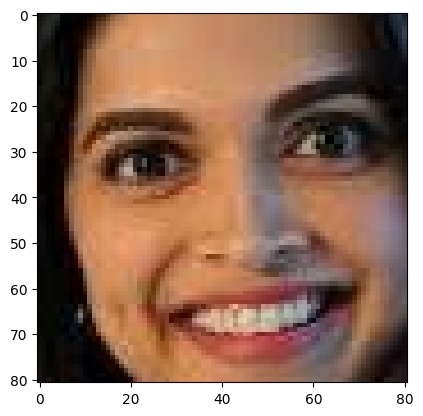

In [33]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [34]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) ## need Fourth deminsion
final_image = final_image/255.0 ## Normalizing

In [41]:
Predications = new_model.predict(final_image)

1/1 [==============================] - 0s 64ms/step


In [42]:
Predications[0]

array([4.2542262e-05, 4.6761426e-07, 2.0904662e-03, 1.6696176e-01,
       1.1231159e-03, 6.8607020e-01, 1.4371146e-01], dtype=float32)

In [43]:
np.argmax(Predications)

5

In [46]:
predicted_label = Classes[np.argmax(Predications)]
print("Predicted Expression:", predicted_label)

Predicted Expression: sad
